In [60]:
import pandas as pd
movies = pd.read_csv(r'C:\Users\marij\OneDrive\Desktop\PROJEKAT\imdb_movies.csv')


In [7]:
pd.set_option('display.max.rows', 11000 )
pd.set_option('display.max.columns', 22 )

In [ ]:
movies[movies.duplicated()] #checking for duplicates

In [11]:
movies.drop_duplicates(inplace = True) #removing duplicates

In [16]:
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360


In [ ]:
movies.dropna(subset = ['genres'], inplace = True) #removing null values

In [15]:
movies['profit'] = movies['revenue'] - movies['budget'] # making a new column for profit

In [74]:
movies_genre = movies[['popularity', 'budget', 'revenue', 'original_title', 'runtime', 'genres', 'release_year', 'vote_count', 'vote_average','profit']] #extracting columns that we need

In [75]:
movies_genre.head()


,popularity,budget,revenue,original_title,runtime,genres,release_year,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015,5562,6.5,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015,6185,7.1,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015,2480,6.3,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015,5292,7.5,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015,2947,7.3,1316249360


In [76]:
from pandas import Series, DataFrame
split = movies_genre['genres'].str.split('|').apply(Series, 1).stack() #spliting genres and putting every indexes on top of a stack
split.index = split.index.droplevel(-1) #every genre assigned to same index
split.name = 'genres_split'
del movies_genre['genres']
movies_genre = movies_genre.join(split)

C:\Users\marij\AppData\Local\Temp\ipykernel_23464\1245767121.py:2: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  split = movies_genre['genres'].str.split('|').apply(Series, 1).stack() #spliting genres and putting every indexes on top of a stack


In [24]:
movies_genre

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,6185,7.1,228436354,Action
...,...,...,...,...,...,...,...,...,...,...
10863,0.065141,0,0,Beregis Avtomobilya,94,1/1/66,11,6.5,0,Mystery
10863,0.065141,0,0,Beregis Avtomobilya,94,1/1/66,11,6.5,0,Comedy
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,11/2/66,22,5.4,0,Action
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,11/2/66,22,5.4,0,Comedy


In [28]:
genres_count = pd.DataFrame(movies_genre.groupby('genres_split').original_title.nunique()).sort_values('original_title', ascending = False) #sorting genres

In [29]:
genres_count

,original_title
genres_split,
Drama,4672
Comedy,3750
Thriller,2841
Action,2339
Romance,1686
Horror,1580
Adventure,1442
Crime,1337
Family,1211


<Axes: title={'center': 'Movies Per Genre in %'}, ylabel='original_title'>

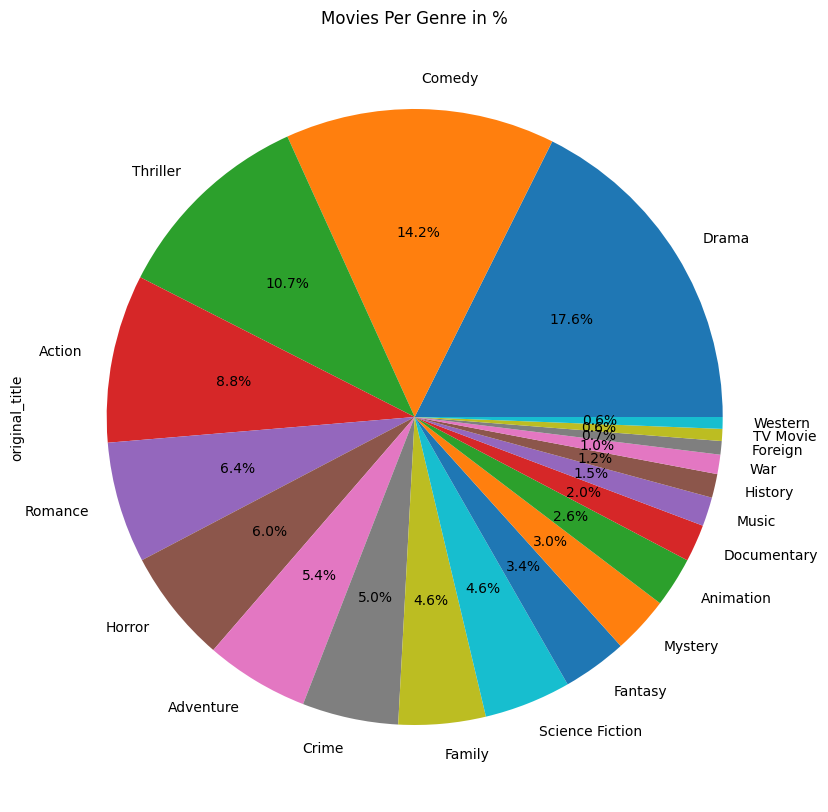

In [31]:
genres_count['original_title'].plot.pie(title = 'Movies Per Genre in %', autopct = '%1.1f%%', figsize = (10,10)) #piechart

<Axes: title={'center': 'Movies Per Genre'}, ylabel='genres_split'>

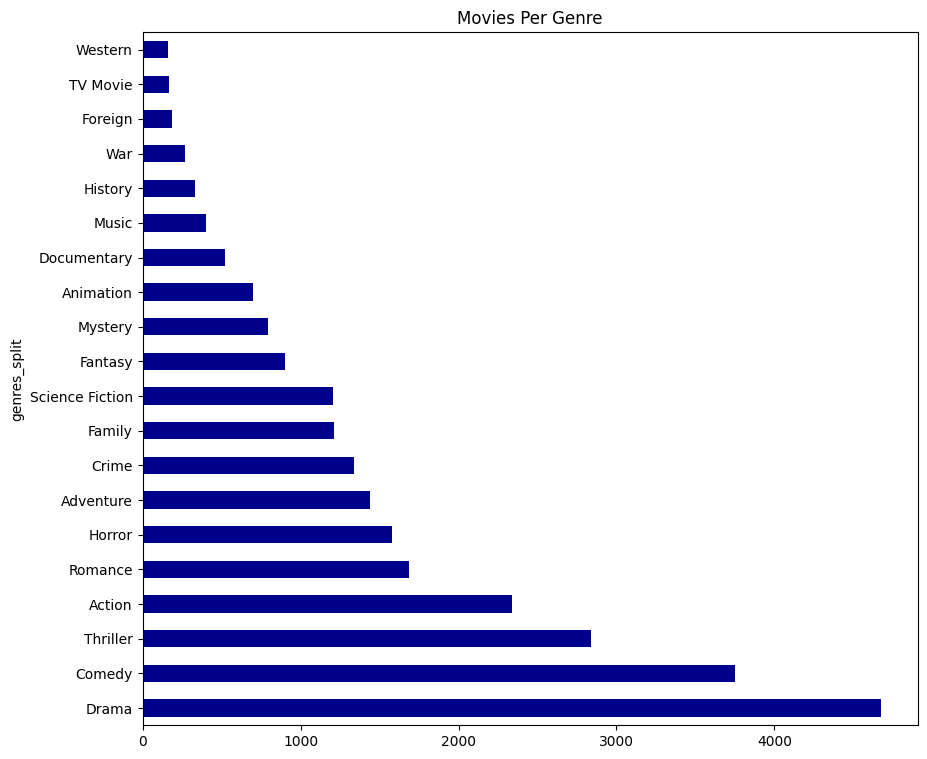

In [35]:
genres_count['original_title'].plot.barh(title = 'Movies Per Genre', color = 'DarkBlue', figsize = (10,9)) #barplot

In [41]:
genres_avg = movies_genre.groupby('genres_split').mean(numeric_only=True)
genres_avg

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
genres_split,,,,,,,
Action,0.926274,2.772782e+07,7.279473e+07,104.917785,392.993708,5.787752,4.506691e+07
Adventure,1.154259,3.754369e+07,1.131379e+08,106.173351,513.125085,5.940585,7.559417e+07
Animation,0.852182,2.315978e+07,7.525606e+07,68.181688,303.000000,6.403147,5.209628e+07
Comedy,0.592607,1.329792e+07,3.752624e+07,96.745057,176.436330,5.905167,2.422833e+07
Crime,0.744930,1.766380e+07,4.236866e+07,106.917282,278.805022,6.124889,2.470486e+07
Documentary,0.181432,5.771491e+05,2.041107e+06,102.651923,35.105769,6.908462,1.463958e+06
Drama,0.591495,1.188072e+07,2.923226e+07,110.478151,182.544538,6.165546,1.735154e+07
Family,0.786668,2.335934e+07,7.243318e+07,89.603574,272.320877,5.997563,4.907384e+07
Fantasy,0.992840,3.261259e+07,9.631366e+07,100.736900,420.741266,5.863537,6.370107e+07


In [42]:
genres_avg.sort_values('budget', ascending = False, inplace = True)

In [43]:
genres_avg

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
genres_split,,,,,,,
Adventure,1.154259,3.754369e+07,1.131379e+08,106.173351,513.125085,5.940585,7.559417e+07
Fantasy,0.992840,3.261259e+07,9.631366e+07,100.736900,420.741266,5.863537,6.370107e+07
Action,0.926274,2.772782e+07,7.279473e+07,104.917785,392.993708,5.787752,4.506691e+07
Science Fiction,1.001548,2.497268e+07,7.014056e+07,99.419854,437.096013,5.665582,4.516788e+07
Family,0.786668,2.335934e+07,7.243318e+07,89.603574,272.320877,5.997563,4.907384e+07
Animation,0.852182,2.315978e+07,7.525606e+07,68.181688,303.000000,6.403147,5.209628e+07
War,0.727683,2.089189e+07,4.760518e+07,127.625926,270.733333,6.297778,2.671330e+07
Western,0.590615,1.897411e+07,2.856871e+07,117.575758,205.739394,6.083030,9.594601e+06
History,0.575936,1.859492e+07,3.201179e+07,136.206587,183.772455,6.410479,1.341687e+07


<Axes: title={'center': 'Budget and Revenue By Genre'}, ylabel='genres_split'>

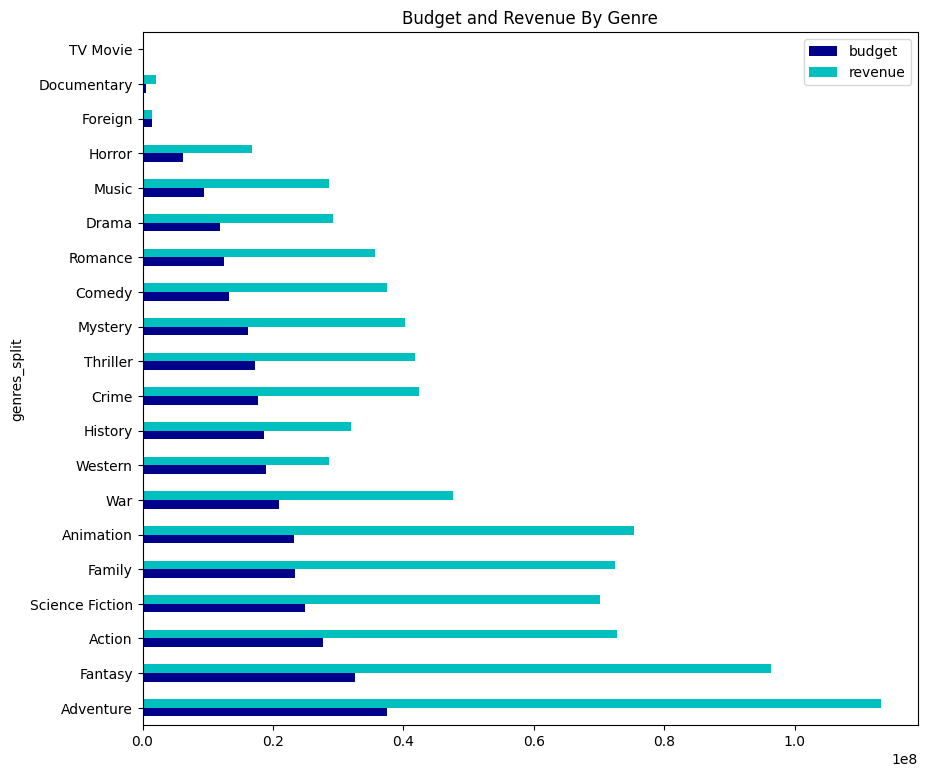

In [46]:
genres_avg[['budget', 'revenue']].plot.barh(title = 'Budget and Revenue By Genre', color = ('DarkBlue', 'c'), figsize = (10,9))

In [48]:
genres_avg.sort_values('profit', ascending = False, inplace = True)

<Axes: title={'center': 'Profit By Genre'}, ylabel='genres_split'>

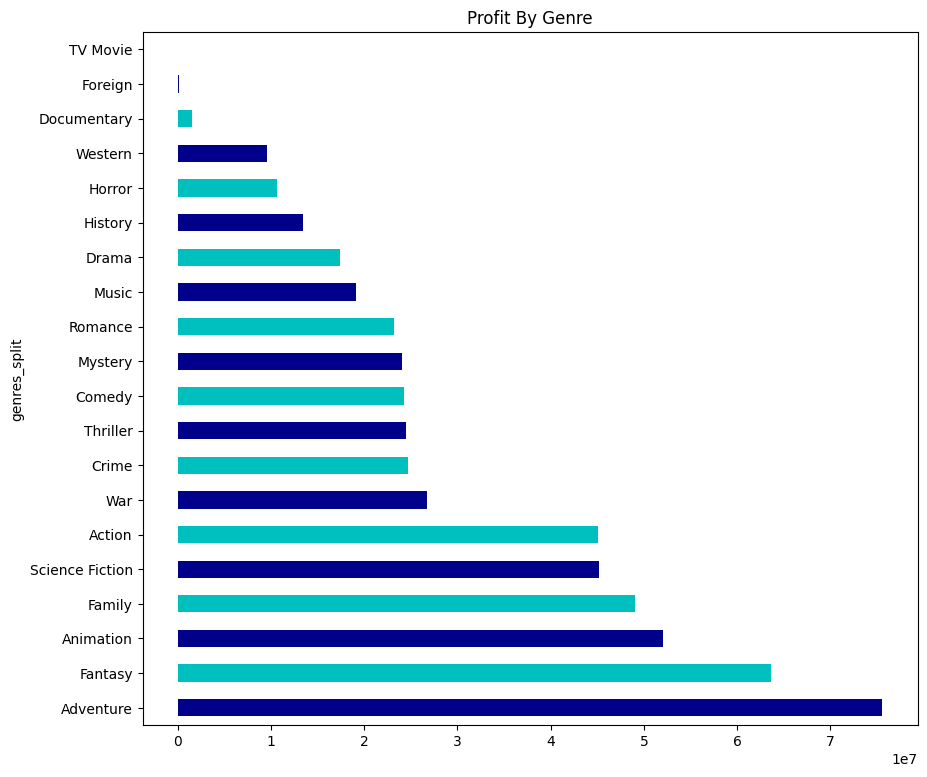

In [49]:
genres_avg['profit'].plot.barh(title = 'Profit By Genre', color = ('DarkBlue', 'c'), figsize = (10,9))

In [50]:
genres_avg.sort_values('popularity', ascending = False, inplace = True)

<Axes: title={'center': 'Popularity By Genre'}, ylabel='genres_split'>

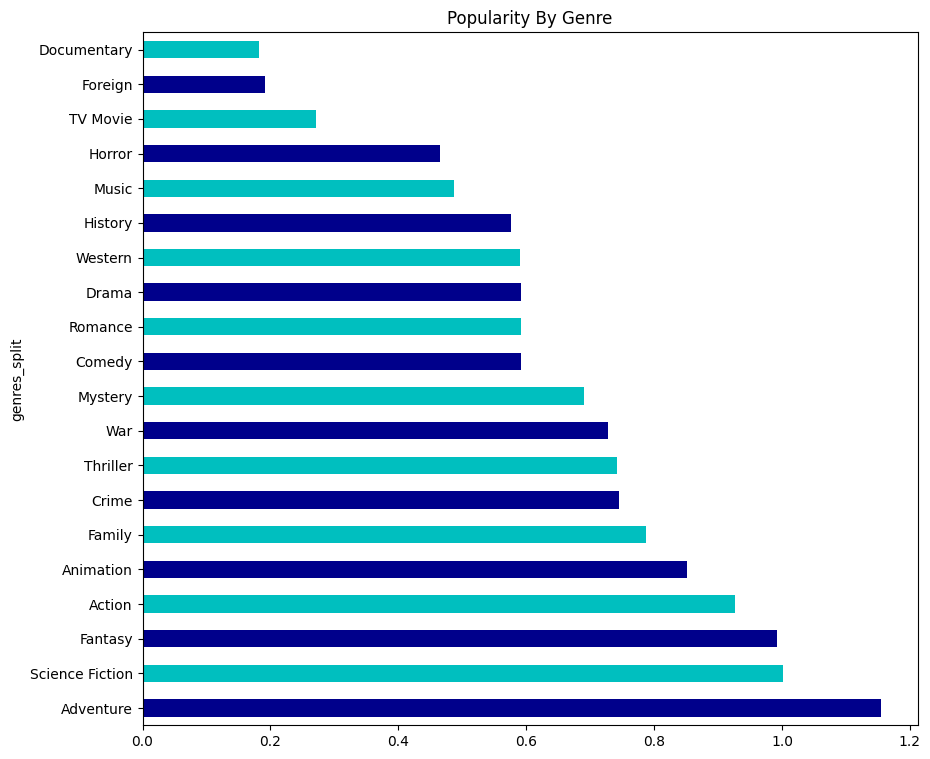

In [51]:
genres_avg['popularity'].plot.barh(title = 'Popularity By Genre', color = ('DarkBlue', 'c'), figsize = (10,9))

In [52]:
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,6185,7.1,228436354,Action


In [55]:
vote_fifty = movies_genre[(movies_genre['vote_count'] >= 50) & (movies_genre['vote_average'] >= 8)]
vote_zero = movies_genre[movies_genre['vote_average'] >= 8]

In [56]:
genres_vote = pd.DataFrame(vote_fifty.groupby('genres_split').vote_average.nunique()).sort_values('vote_average', ascending = False) #sorting genres

<Axes: title={'center': 'Vote Average by Genre'}, ylabel='genres_split'>

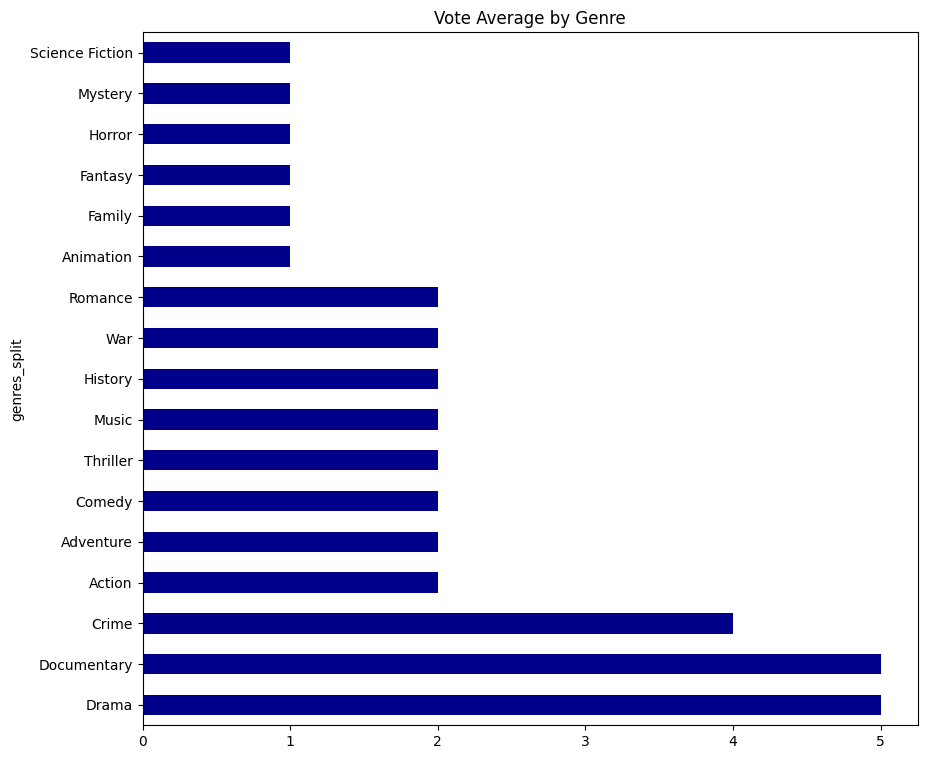

In [58]:
genres_vote['vote_average'].plot.barh(title = "Vote Average by Genre", color = 'DarkBlue', figsize = (10,9))

In [61]:
movies.drop_duplicates(inplace = True) #removing duplicates
movies['profit'] = movies['revenue'] - movies['budget'] # making a new column for profit
movies_genre = movies[['popularity', 'budget', 'revenue', 'original_title', 'runtime', 'genres', 'release_date', 'vote_count', 'vote_average','profit']] #extracting columns that we need

In [62]:
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,1316249360


In [69]:
movies_counted = movies_genre[movies_genre['vote_count'] >= 50]
movies_counted = movies_counted.select_dtypes(include=['float64', 'int64'])
movies_counted.corr(method = 'spearman')

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
popularity,1.000000,0.485149,0.588739,0.230518,0.768966,0.188670,0.498117
budget,0.485149,1.000000,0.714828,0.360230,0.554586,-0.044440,0.334390
revenue,0.588739,0.714828,1.000000,0.341707,0.682656,0.111731,0.842221
runtime,0.230518,0.360230,0.341707,1.000000,0.263460,0.285514,0.212060
vote_count,0.768966,0.554586,0.682656,0.263460,1.000000,0.284470,0.583602
vote_average,0.188670,-0.044440,0.111731,0.285514,0.284470,1.000000,0.198308
profit,0.498117,0.334390,0.842221,0.212060,0.583602,0.198308,1.000000


<Axes: xlabel='vote_average', ylabel='profit'>

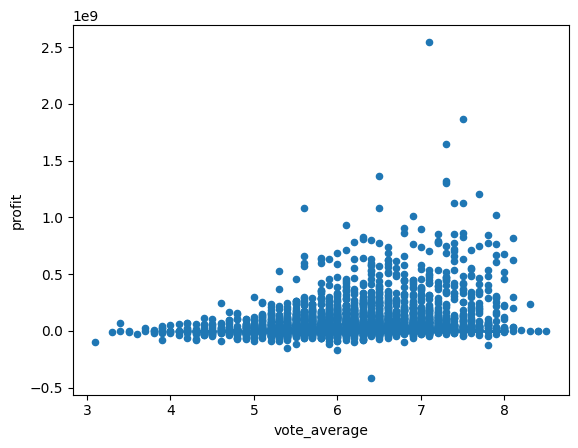

In [70]:
movies_counted.plot.scatter(x = 'vote_average', y = 'profit')

In [71]:
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,1316249360


In [77]:
time_genre = pd.DataFrame(movies_genre.groupby(['release_year', 'genres_split'])['profit'].mean()) # Group by release year and genre, then calculate the mean profit

In [78]:
final_genre = pd.pivot_table(time_genre, values='profit', index=['genres_split'], columns=['release_year']) ## Create a pivot table for profit per genre per year

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt  #


Text(0.5, 1.0, 'Genres by Profit per Year')

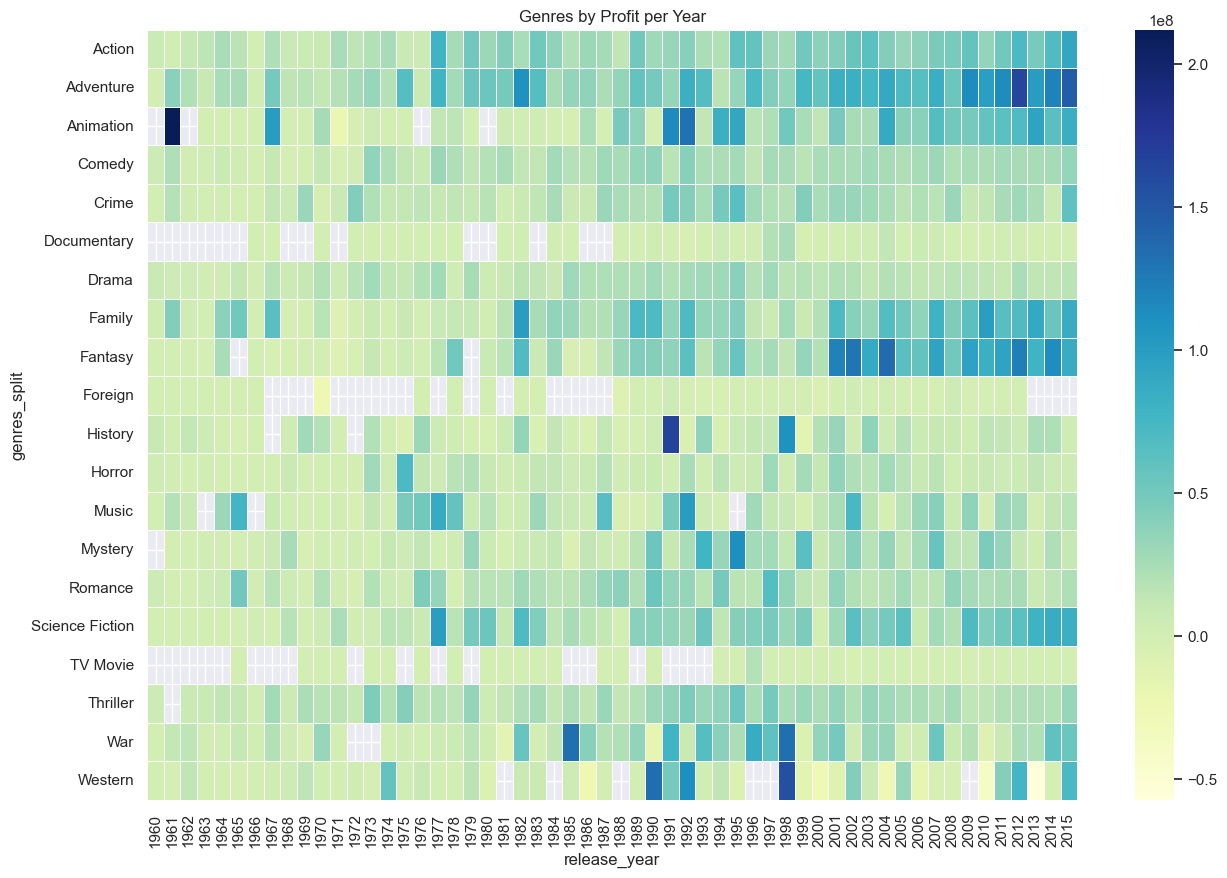

In [84]:
sns.set(rc={'figure.figsize':(15, 10)})
sns.heatmap(final_genre, cmap='YlGnBu', linewidths=.5)
plt.title('Genres by Profit per Year')